In [1]:
"""IA applied for PHM"""
#imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import plot_tree
from io import StringIO
import graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz


#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction


In [124]:
df_FE = pd.read_csv('FE.csv',  
                   sep = ';',  
                   engine = 'python') #vous avez simplement à changer le path ici
df_BF = pd.read_csv('BF.csv',  
                   sep = ';',  
                   engine = 'python')

df_CO = pd.read_csv('CO.csv',  
                   sep = ';',  
                   engine = 'python')

df_FI = pd.read_csv('FI.csv',  
                   sep = ';',  
                   engine = 'python')


In [125]:
#describe the data 
df_FE


Source.Name   Time   Pressure1      Flow   Pressure2  FE
0       FE02P20M1.txt    0.0    1.500000 -4.000000    1.500000  FE
1       FE02P20M1.txt    0.1    3.223474 -3.927881    1.983577  FE
2       FE02P20M1.txt    0.2    8.495433 -3.611841    4.514395  FE
3       FE02P20M1.txt    0.3   14.676788 -3.055776    9.959515  FE
4       FE02P20M1.txt    0.4   20.898178 -2.293626   16.721024  FE
...               ...    ...         ...       ...         ...  ..
56051  FE02P170M4.txt   99.6  189.147759 -4.000000  188.749563  FE
56052  FE02P170M4.txt   99.7  189.503879 -4.000000  189.116552  FE
56053  FE02P170M4.txt   99.8  189.876260 -4.000000  189.499105  FE
56054  FE02P170M4.txt   99.9  190.264104 -4.000000  189.896473  FE
56055  FE02P170M4.txt  100.0  190.666591 -4.000000  190.307888  FE

[56056 rows x 6 columns]

In [126]:
#replacing name FE of column by state : Type of failure
df_FE.rename(columns={'FE':'Type of failure'}, 
                 inplace=True)

df_CO.rename(columns={'Etat':'Type of failure'}, 
                 inplace=True)
df_FI.rename(columns={'Etat':'Type of failure'}, 
                 inplace=True)
df_FI.rename(columns={'Pressure 1':'Pressure1'}, 
                 inplace=True)
df_FI.rename(columns={'Pressure 2':'Pressure2'}, 
                 inplace=True)
df_BF.rename(columns={'Etat':'Type of failure'}, 
                 inplace=True)

In [78]:
df_FE

Source.Name   Time   Pressure1      Flow   Pressure2 Type of failure
0       FE02P20M1.txt    0.0    1.500000 -4.000000    1.500000              FE
1       FE02P20M1.txt    0.1    3.223474 -3.927881    1.983577              FE
2       FE02P20M1.txt    0.2    8.495433 -3.611841    4.514395              FE
3       FE02P20M1.txt    0.3   14.676788 -3.055776    9.959515              FE
4       FE02P20M1.txt    0.4   20.898178 -2.293626   16.721024              FE
...               ...    ...         ...       ...         ...             ...
56051  FE02P170M4.txt   99.6  189.147759 -4.000000  188.749563              FE
56052  FE02P170M4.txt   99.7  189.503879 -4.000000  189.116552              FE
56053  FE02P170M4.txt   99.8  189.876260 -4.000000  189.499105              FE
56054  FE02P170M4.txt   99.9  190.264104 -4.000000  189.896473              FE
56055  FE02P170M4.txt  100.0  190.666591 -4.000000  190.307888              FE

[56056 rows x 6 columns]

In [127]:
df_FI

Source.Name   Time   Pressure1      Flow   Pressure2  \
0      fi02p100m1.data    0.0    1.500000 -4.011488    1.500000   
1      fi02p100m1.data    0.1    3.224121 -3.943047    1.986408   
2      fi02p100m1.data    0.2    8.498547 -3.645856    4.528138   
3      fi02p100m1.data    0.3   14.687278 -3.128409   10.001615   
4      fi02p100m1.data    0.4   20.924916 -2.410888   16.803271   
...                ...    ...         ...       ...         ...   
56051   fi08p70m4.data   99.6  187.712623 -7.008081  186.852207   
56052   fi08p70m4.data   99.7  187.525548 -7.006885  186.705447   
56053   fi08p70m4.data   99.8  187.377502 -7.005982  186.594638   
56054   fi08p70m4.data   99.9  187.266511 -7.005357  186.518064   
56055   fi08p70m4.data  100.0  187.190665 -7.004998  186.474058   

      Type of failure  
0                  FI  
1                  FI  
2                  FI  
3                  FI  
4                  FI  
...               ...  
56051              FI  
56052              FI  
56053              FI  
56054              FI  
56055              FI  

[56056 rows x 6 columns]

In [128]:
df_BF

Source.Name   Time   Pressure1      Flow   Pressure2 Type of failure
0      bfp100m1.data    0.0    1.500000 -4.000000    1.500000              BF
1      bfp100m1.data    0.1    3.224323 -3.927881    1.987293              BF
2      bfp100m1.data    0.2    8.499528 -3.611841    4.532509              BF
3      bfp100m1.data    0.3   14.690709 -3.055778   10.015640              BF
4      bfp100m1.data    0.4   20.934057 -2.293624   16.832246              BF
...              ...    ...         ...       ...         ...             ...
45040   bfp70m5.data   99.6  188.373496 -4.000000  187.300040              BF
45041   bfp70m5.data   99.7  188.004703 -4.000000  187.003664              BF
45042   bfp70m5.data   99.8  187.697839 -4.000000  186.762837              BF
45043   bfp70m5.data   99.9  187.449757 -4.000000  186.575089              BF
45044   bfp70m5.data  100.0  187.257503 -4.000000  186.437965              BF

[45045 rows x 6 columns]

In [81]:
df_CO

Source.Name   Pressure1      Flow   Pressure2 Type of failure
0      CO02P100M1    1.500000 -4.000000    1.500000              CO
1      CO02P100M1    3.248317 -3.927881    1.795798              CO
2      CO02P100M1    8.637469 -3.611841    3.723881              CO
3      CO02P100M1   14.938684 -3.055773    8.693364              CO
4      CO02P100M1   21.186308 -2.293620   15.527742              CO
...           ...         ...       ...         ...             ...
56051   CO08P70M4  189.167469 -4.000000  187.927179              CO
56052   CO08P70M4  188.699771 -4.000000  187.545628              CO
56053   CO08P70M4  188.299105 -4.000000  187.223575              CO
56054   CO08P70M4  187.962066 -4.000000  186.958300              CO
56055   CO08P70M4  187.685419 -4.000000  186.747160              CO

[56056 rows x 5 columns]

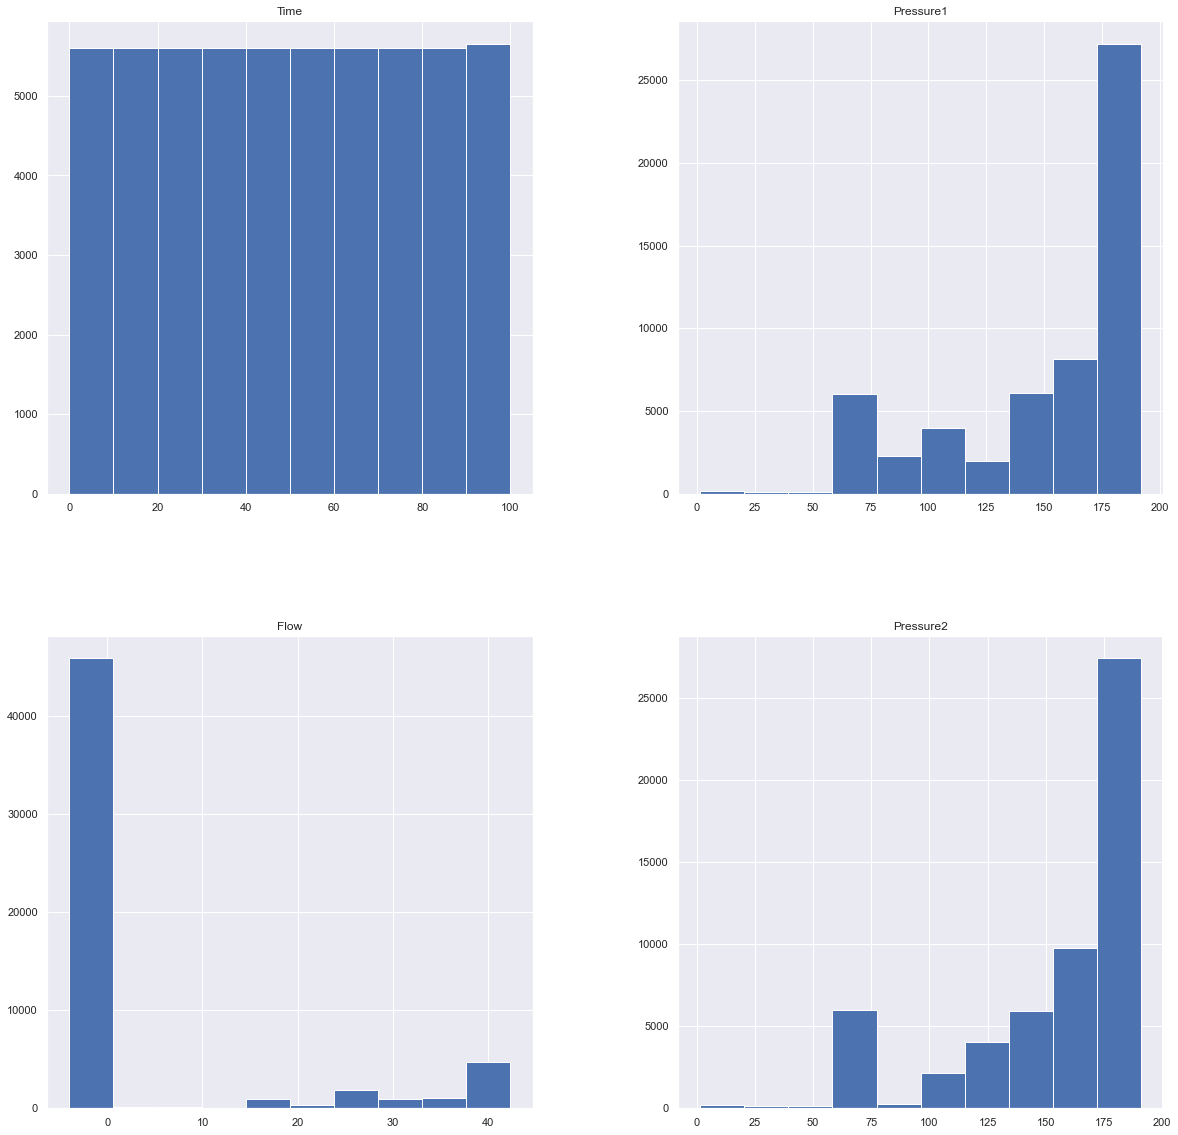

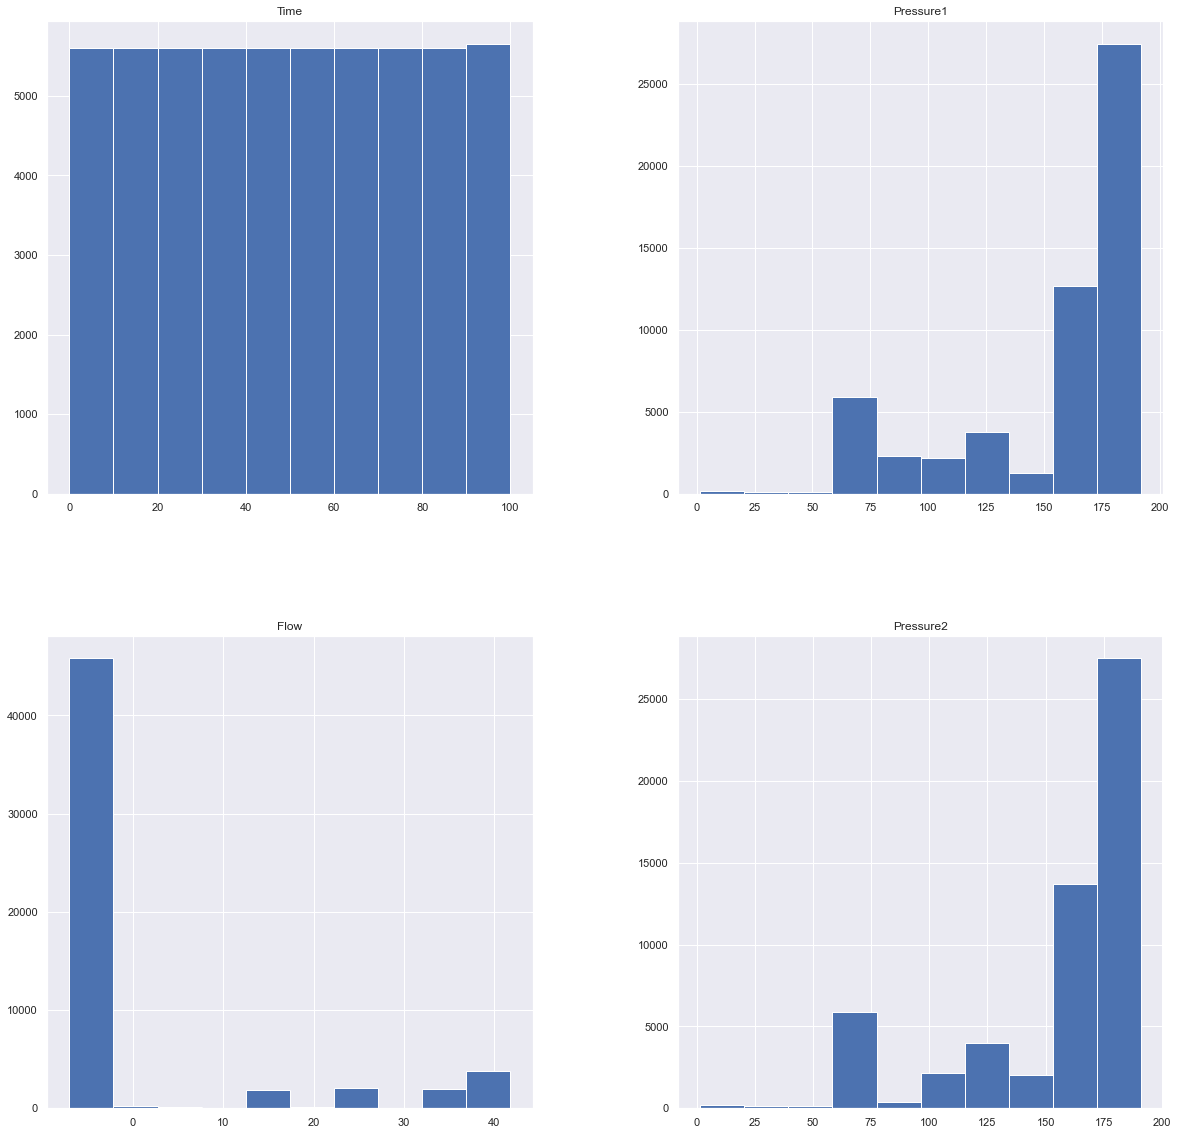

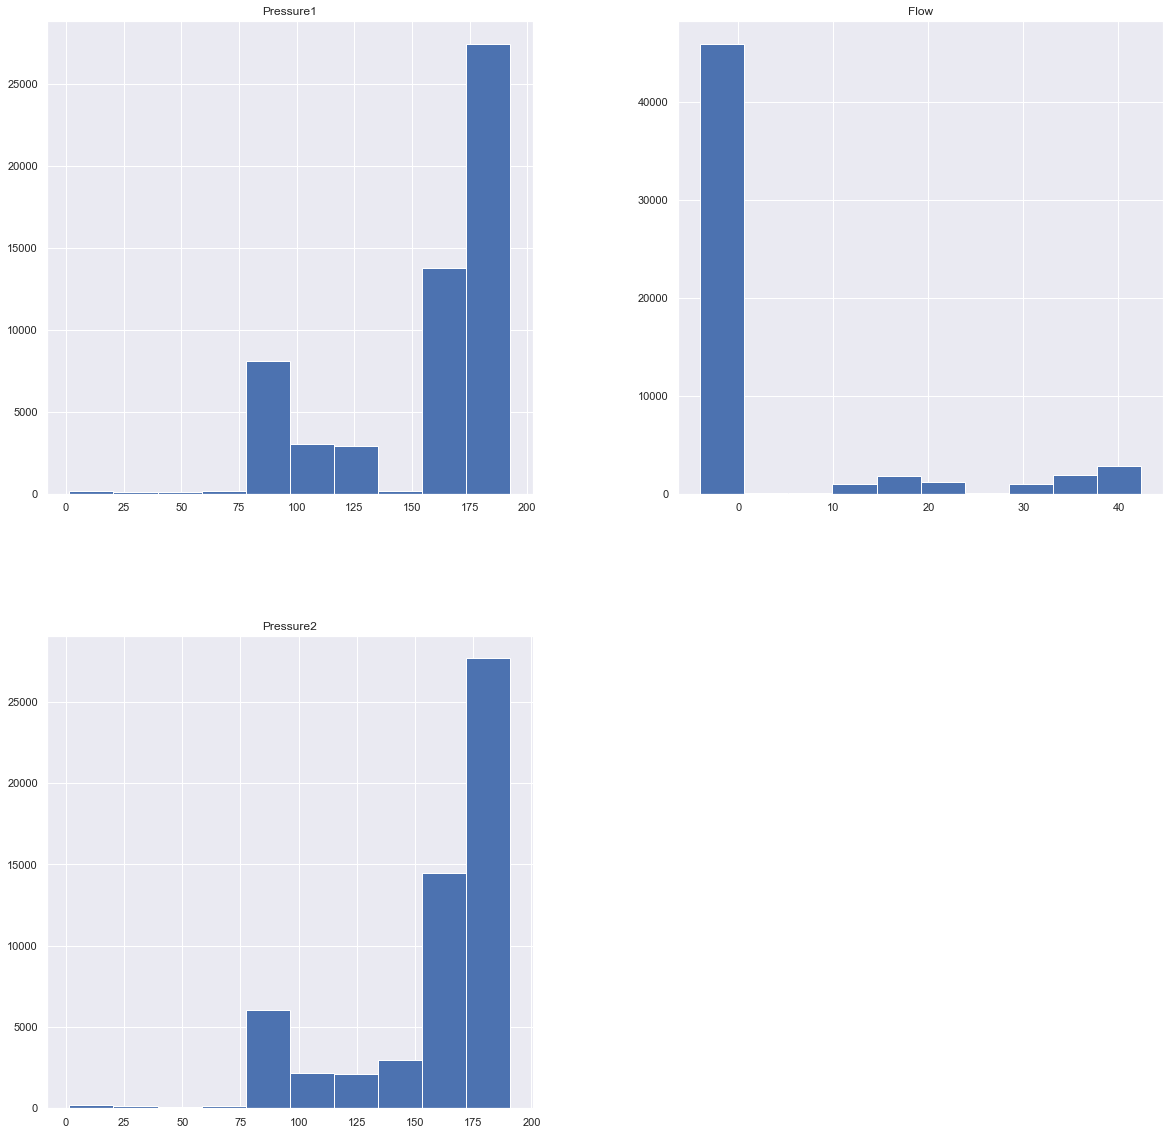

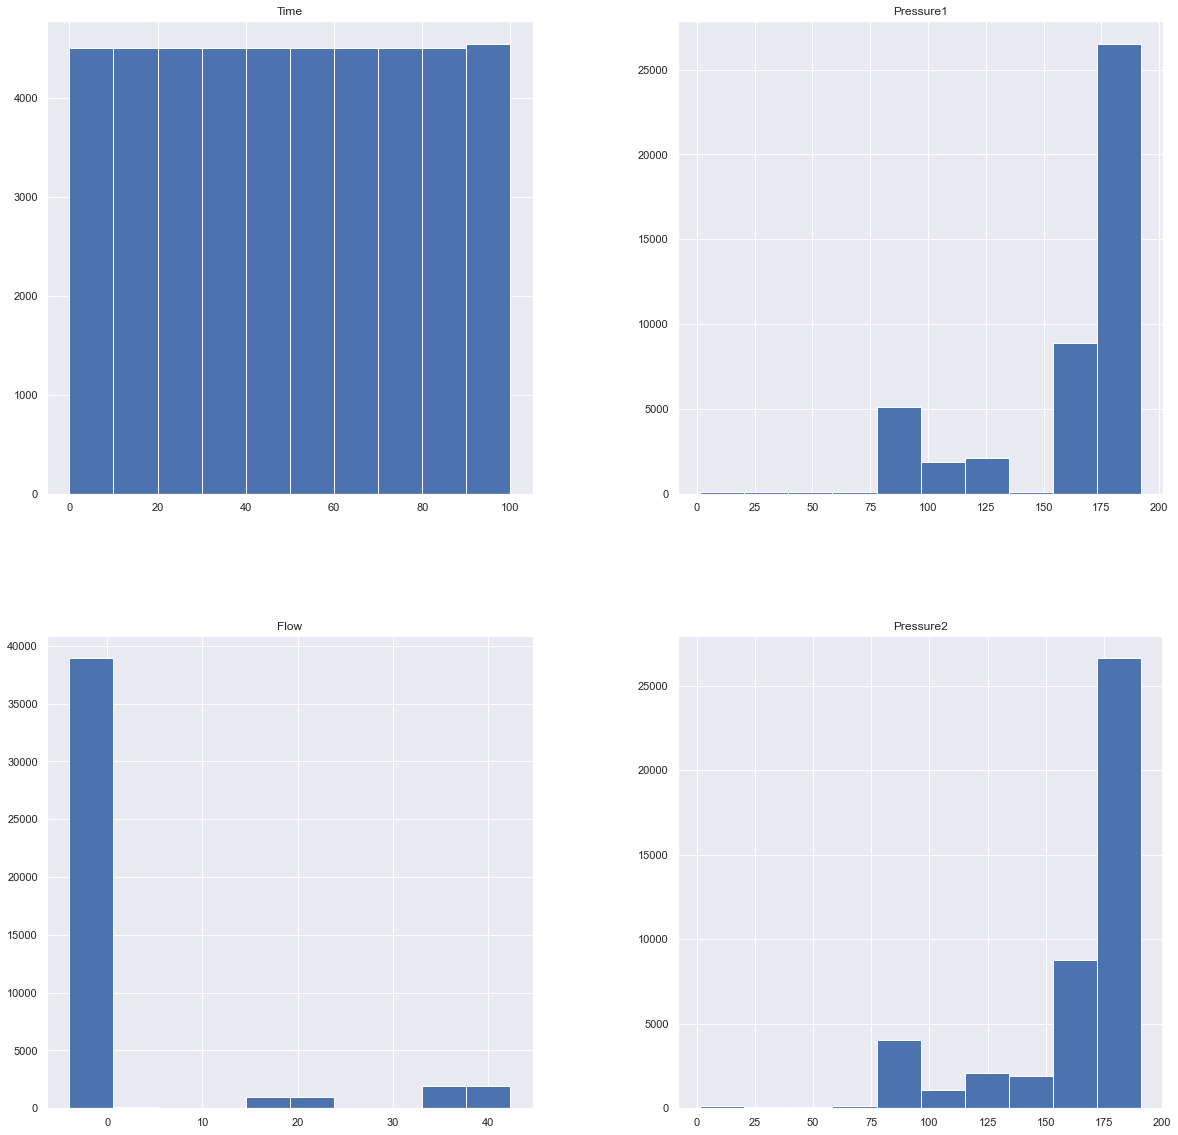

In [129]:
p1 = df_FE.hist(figsize = (20,20))
p2 =  df_FI.hist(figsize = (20,20)) #data histogram 
p3 = df_CO.hist(figsize = (20,20))
p4 = df_BF.hist(figsize = (20,20))

In [82]:
df_FE.shape

(56056, 6)

In [ ]:
"""p5 = sns.pairplot(df_BF) #observing the data
p6 = sns.pairplot(df_FI) #observing the different data 
p7 = sns.pairplot(df_FE)
p8 = sns.pairplot(df_CO)"""

In [83]:
df_CO.shape

(56056, 5)

In [84]:
frames = [df_BF, df_FI, df_FE, df_CO]
dataframe = pd.concat(frames,ignore_index=True)

In [85]:
dataframe.shape

(213213, 6)

In [86]:
dataframe.iloc[114817,:]

Source.Name        FE08P50M3.txt
Time                        70.3
Pressure1                188.597
Flow                          -4
Pressure2                188.013
Type of failure               FE
Name: 114817, dtype: object

In [87]:
#label encoder, in this part we will do the pre-process for the D-Tree
X = dataframe[['Pressure1', 'Flow', 'Pressure2']].values

In [88]:
X = np.nan_to_num(X)#remove Nan to 0 --> very important for the Decision_Tree

In [89]:
X[0:5]

array([[ 1.5       , -4.        ,  1.5       ],
       [ 3.22432279, -3.92788089,  1.98729333],
       [ 8.49952786, -3.61184132,  4.53250875],
       [14.69070919, -3.05577751, 10.01564013],
       [20.93405728, -2.29362398, 16.83224613]])

In [90]:
type(X)

numpy.ndarray

In [91]:
y = dataframe["Type of failure"]
print(y)
y.shape
y[0]


0         BF
1         BF
2         BF
3         BF
4         BF
          ..
213208    CO
213209    CO
213210    CO
213211    CO
213212    CO
Name: Type of failure, Length: 213213, dtype: object


'BF'

In [92]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2)#20%

In [131]:
X_trainset.shape

(170570, 3)

In [132]:
X_testset.shape

(42643, 3)

In [133]:
print(y_trainset.shape, y_testset.shape)

(170570,) (42643,)


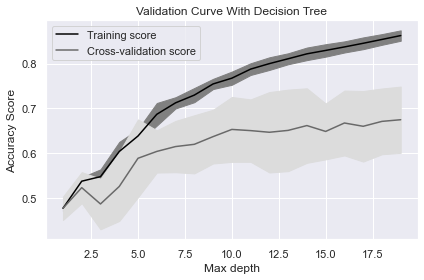

In [96]:

train_scores, test_scores =validation_curve(DecisionTreeClassifier(), X, y, param_name='max_depth',param_range=np.arange(1, 20),cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

param_range=np.arange(1, 20)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Decision Tree")
plt.xlabel("Max depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()


In [109]:
PHM_Tree = DecisionTreeClassifier(criterion='gini',max_depth = 15)
PHM_Tree # it shows the default parameters

#on joue sur le max_depth pour augmenter l'accuracy

DecisionTreeClassifier(max_depth=15)

In [111]:
PHM_Tree.fit(X_trainset,y_trainset)
DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [130]:
predTree = PHM_Tree.predict(X_testset)

scores = cross_val_score(PHM_Tree, X, y, cv=5)

print(scores)



[0.74183336 0.72208803 0.62802805 0.61155668 0.58379063]


In [113]:
print (predTree [0:20])


"print(X_testset[0:20])"

print (y_testset [0:20])


['BF' 'FE' 'FE' 'BF' 'FI' 'FI' 'FE' 'FE' 'BF' 'BF' 'FI' 'FI' 'BF' 'FI'
 'BF' 'BF' 'BF' 'CO' 'BF' 'FE']
207980    CO
154411    FE
152988    FE
4288      BF
47799     FI
5448      BF
118625    FE
135884    FE
131344    FE
116420    FE
63266     FI
21734     BF
17051     BF
81918     FI
24430     BF
4905      BF
18310     BF
209548    CO
11289     BF
120545    FE
Name: Type of failure, dtype: object


In [114]:

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))
#ça commence à devenir pas mal ;)

DecisionTrees's Accuracy:  0.8208381211453228


In [134]:

dot_data = StringIO()
filename = "PHMtree.png"
featureNames = dataframe.columns[2:5]
targetNames = dataframe["Type of failure"].unique().tolist()
out=tree.export_graphviz(PHM_Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

fig = plt.figure(figsize=(100,200))

a = plot_tree(PHM_Tree, 
              feature_names=featureNames, 
              class_names=targetNames, 
              filled=True, 
              rounded=True, 
              fontsize=14)

for o in a:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)
#petit soucis on arrive pas à tout voir pour l'arbre
# à vous de jouer :)



In [115]:
dataframe.columns #observing columns 

Index(['Source.Name', 'Time', 'Pressure1', 'Flow', 'Pressure2',
       'Type of failure'],
      dtype='object')

In [116]:
X.shape

(213213, 3)

In [117]:
df_Test = pd.read_csv('Test1.csv',  
                   sep = ';',  
                   engine = 'python')

In [61]:
X_new = df_Test[['Pressure1', 'Flow', 'Pressure2']].values
y_new = df_Test["Source.Name"]
X_new.shape

(8008, 3)

In [118]:
predTree1 = PHM_Tree.predict(X_new)

In [121]:
N=np.random. randint(0,8008,23)
print(N)

[2578 6393 4310 2608 4304 4847 2332 1721 3745 4973 5584 7433 1074 2345
 6181 1756 5733 5658 1526 3412 6950 6229 6084]


In [122]:
"print(X_new[N])"

print (predTree1[N])

print(y_new[N])

['BF' 'FI' 'FE' 'BF' 'FE' 'FE' 'BF' 'BF' 'BF' 'FE' 'FE' 'FI' 'BF' 'BF'
 'FI' 'FE' 'FE' 'FE' 'BF' 'FE' 'FI' 'FI' 'FI']
2578    CO035P105M2
6393     FI035P45M2
4310    FE0275P42M2
2608    CO035P105M2
4304    FE0275P42M2
4847    FE0275P42M2
2332    CO035P105M2
1721        BFP45M3
3745     CO065P65M3
4973    FE0275P42M2
5584    FE0875P71M2
7433     FI065P89M2
1074        BFP45M3
2345    CO035P105M2
6181     FI035P45M2
1756        BFP45M3
5733    FE0875P71M2
5658    FE0875P71M2
1526        BFP45M3
3412     CO065P65M3
6950     FI035P45M2
6229     FI035P45M2
6084     FI035P45M2
Name: Source.Name, dtype: object
